# K-Means



 توجه توضیح یسری از سلول ها اگر وجود نداره در فایل

music.ipynb
 هست


 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.

In [237]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, k_means

دیتا از:https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset/notebookد
~~~Data

In [238]:
x=pd.read_csv('IRIS.csv')
x[:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [239]:
x.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [240]:
x=np.asanyarray(x)



برای نمایش شکل ستون و ستون دوم

To display the shape of a column and the second column

پراکندگی بسیار بالاس

The dispersion is very high


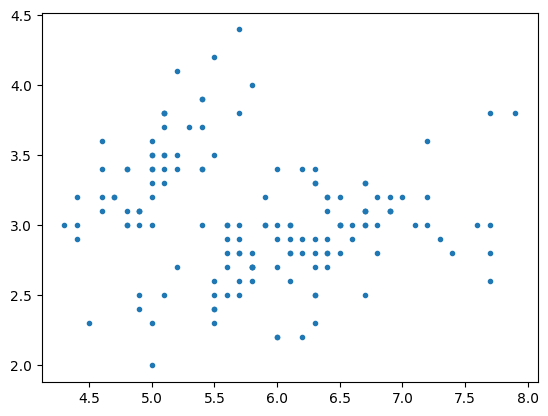

In [241]:
plt.scatter(x[:,0],x[:,1],marker='.')

In [242]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,4]=lb.fit_transform(x[:,4])




In [243]:
from sklearn.preprocessing import MinMaxScaler
x=np.nan_to_num(x)
x=MinMaxScaler().fit_transform(x)
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 0.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 0.        ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.13888889, 0.41666667, 0.06779661, 0.        , 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        , 0.        ],
       [0.41666667, 0.83333333, 0.


**فشرده‌سازی داده:**
این فرآیند به شما کمک می‌کند داده‌هایی را که ساختار مناسبی ندارند، به شکل بهینه‌تری تبدیل کرده و قابل استفاده‌تر کنید.
معیار n_components=2
داده‌ها رو از فضای اصلی‌شون (مثلاً 1000 بعد) فشرده میکنه  به فقط 2 بعد.


**n_components=2:**
Compress the data from its original space (e.g., 1000 dimensions) down to just 2 dimensions.



In [244]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)



4 تا خوشه بساز


Create 4 clusters


In [245]:
k=4
model=KMeans(init='k-means++',n_clusters=k,n_init=10).fit(x)
KMeans

sklearn.cluster._kmeans.KMeans



هر نقطه داده متعلق به یک خوشه خاص هست.

Each data point belongs to one specific cluster.





In [246]:
labels =model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)


مختصات هر خوشه رو برمیگرداند.

It returns the coordinates of each cluster.

In [247]:
center= model.cluster_centers_
center

array([[ 0.60884958, -0.12030086],
       [-0.79537486,  0.05590027],
       [ 0.08864554, -0.0844795 ],
       [ 0.79010835,  0.155403  ]])



همون طور که ما در طبقه بندی معیار هایی برای ارزیابی داشتیم در خوشه بندی هم معیار هایی برای ارزیابی میزان عملکرد خوشه بندیمون داریم

1_شاخص سلوئت

2_شاخص چن

3_شاخص بولدین

4_شاخص اینرسی

Just like we have evaluation metrics in classification, we also have metrics to assess the performance of clustering.

1. Silhouette Score
2. Calinski-Harabasz Index
3. Davies-Bouldin Index
4. Inertia




شاخص سلوئت  به ما میگ حوشخ بندی ما چقدر تمیز و درست انجام شده مقدار نمره بالاتر و نزدیک به 1 نشون دهنده خوشه بندی بهتر است.
در اینجا چون خوشه بندی نمره 62 رو گرفته خوشه بندی خیلی عالی نبوده و کیفیت خوشه بندی متوسط یا ضعیف بوده.

The Silhouette Score tells us how clean well-separated our clustering is. A higher score, closer to 1, indicates better clustering quality.
Here, since the clustering received a score of 62, the result is not very strong, and the clustering quality is considered moderate or weak.

In [248]:
from sklearn.metrics import silhouette_score
silhouette_score(x, labels)

0.625415193907927



شاخص بولدین میانگین نبست فاصله بین خوشه هارو به اندازه خوشه ها اندازه گیری میکنه
مقدار نزدیک به 0 نشون دهنده خوشه بندی بهتر و مقدار نزدیک به 1 یا بیشتر نشون دهنده خوشه بندی ضعیف هس.

Davies–Bouldin Index measures the average ratio of the distance between clusters to the size of the clusters.
A value close to 0 indicates better clustering, and a value close to 1 or higher indicates poor clustering.

در اینجا خوشه بندی نمره 54 رو گرفته است که نشون دهنده کیفیت خوشه بندی متوسط هس

Here, the clustering received a score of 54, which indicates a moderate clustering quality.

In [249]:
from sklearn.metrics import  davies_bouldin_score
davies_bouldin_score(x, labels)

0.5432264907399198



شاخص چن در واقعه نسبت فاصله های بین خوشه رو به پراکندگی هایی که درون خوشه قرار داره رو محاسبه میکنه
در اینجا نمره بسیار بالایی گرفته که نشون میده خوشه ها از هم فاصله دارن و باهم قاطی نشدن که این عالیه.

The Calinski–Harabasz Index calculates the ratio of the distances between clusters to the dispersions within clusters
Here, it received a very high score, which indicates that the clusters are well-separated and not mixed—this is excellent


In [250]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, labels)

666.970380433014



شاخص اینرسی در واقعه میاد مجموع مربعات فاصله های بین نقاط رو با مرکز خوشه محاسبه میکنه. این شاخص درواقع برای اندازه گیری میزان پراکندگی هست که در خوشه ها وجود داره.
مقدار بالاتر نشون دهنده پراکندگی بیش از حد درون داده هاس و خوشه بندی ضعیف تر ولی مقدار پایین تر نشون دهنده اینکه پراکندگی درون  خوشه ها کمتره و خوشه بندی بهتره.
دراینجا چون نمره شده 4 نشون میده پراکندگی خیلی بالاس در هر خوشه.

Inertia is a metric that calculates the sum of squared distances between data points and their cluster centers. It is used to measure the amount of dispersion within clusters. A higher value indicates excessive spread among the data and weaker clustering, while a lower value suggests tighter clusters and better clustering quality. In this case, since the score is 6, it shows that the dispersion within each cluster is quite high.

In [251]:
z=model.inertia_
print(z)

4.297984926841806



بطور کلی این خوشه بندی عالی عمل نکرده البته باید درنظر بگیریم در نظر گرفتن یک معیار و ارزیابی بر اساس یک معیار فقط به معنی ضعیف بودن یا عالی بودن خوشه بندی ما نیست باید حتما حتما همه معیار هارو درنظر بگیریم و بعد ارزیابی کلی کنیم.

Overall, this clustering did not perform excellently. However, it's important to remember that evaluating based on a single metric does not necessarily mean the clustering is weak or strong. We must consider **all relevant metrics** together to make a comprehensive assessment


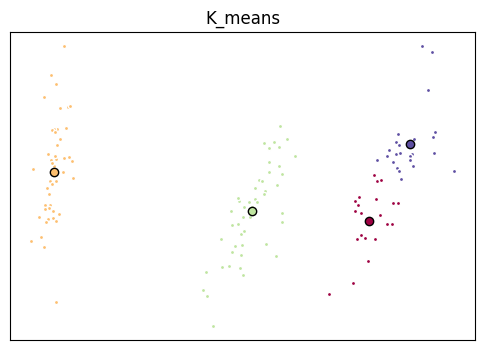

In [259]:
fig=plt.figure(figsize=(6,4)) # بساز ی شکل 6 در 4__Create a 6 by 4 shape

color=plt.cm.Spectral(np.linspace(0,1,len(set(labels)))) # برای ایجاد آرایه ای از رنگ ها بر اسا برچسب های یکتای خوشه بندی

ax=fig.add_subplot(1,1,1) # ایجاد نمودار

for i, j in zip(range(len(center)),color):# ایجاد خوشه بر اسا موقعیت
    my_members=(labels==i)# قرار گیری نقاط در هر حوشه رنگی
    cluster=center[i]# مشخص کردن مرکز در خوشه

    ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=j,marker='.')# مختصات نقاط داده

    ax.plot(cluster[0],cluster[1],'o',markerfacecolor=j,markeredgecolor='k',markersize=6)# مختصات نقاط مرکز


ax.set_xticks(()) #هیچ عددی نشون نده در  طول
ax.set_yticks(())# هیچ عدی نشون نده در عرض
ax.set_title('K_means')# بالای نمودار اینو بزن
plt.show()# شکل رو نشونم بده